In [ ]:




[Direction: 수도권 일자리 분산 - 수도권에 인구가 집중되었던 이유: 생산성(일자리)]





In [ ]:
Insight

- 인구 비율과의 33%의 가장 높은 상관관계를 보이는 생산성이 인구 상승의 가장 밀접한 관계가 있다고 판단된다.

In [ ]:
수도권/비수도권 인구비율 확인

2016~2025. "행정동별 주민등록 인구 및 세대현황". 행정안전부.

수도권(수도권 지하철 연결 도시): 서울, 인천, 경기도 

In [53]:
import pandas as pd

filePath = "../../temp_data/0_raw/2016-2025_한국인구.csv"
df = pd.read_csv(filePath, encoding='cp949', thousands=',')

print(df.head())
print(df.columns)

                  행정구역  2016년_총인구수  2016년_세대수  2016년_세대당 인구  2017년_총인구수  \
0     전국  (1000000000)    51696216   21294009          2.43  51778544.0   
1  서울특별시  (1100000000)     9930616    4189839          2.37   9857426.0   
2  부산광역시  (2600000000)     3498529    1451270          2.41   3470653.0   
3  대구광역시  (2700000000)     2484557     994220          2.50   2475231.0   
4  인천광역시  (2800000000)     2943069    1171399          2.51   2948542.0   

    2017년_세대수  2017년_세대당 인구  2018년_총인구수   2018년_세대수  2018년_세대당 인구  ...  \
0  21632851.0          2.39  51826059.0  22042947.0          2.35  ...   
1   4220082.0          2.34   9765623.0   4263868.0          2.29  ...   
2   1467555.0          2.36   3441453.0   1480468.0          2.32  ...   
3   1006753.0          2.46   2461769.0   1021266.0          2.41  ...   
4   1188917.0          2.48   2954642.0   1213201.0          2.44  ...   

   2022년_세대당 인구  2023년_총인구수   2023년_세대수  2023년_세대당 인구  2024년_총인구수   2024년_세대수  \
0          2.17  513253

In [54]:
# 필요 행(전국/수도권/비수도권), 칼럼(행정구역/각 연도별 총 인구수)만 추출

df = df[df['행정구역'].str.contains('전국|서울특별시|인천광역시|경기도', na=False)]

# 수도권

# 칼럼 추출
pop_cols = [col for col in df.columns if '총인구수' in col]

seoul    = df[df['행정구역'].str.contains('서울')][pop_cols].iloc[0]
incheon  = df[df['행정구역'].str.contains('인천')][pop_cols].iloc[0]
gyeonggi = df[df['행정구역'].str.contains('경기도')][pop_cols].iloc[0]

capital = seoul + incheon + gyeonggi

# 비수도권

national = df[df['행정구역'].str.contains('전국')][pop_cols].iloc[0]
non_capital = national - capital

# staging_df
staging_df = pd.DataFrame({
    '행정구역': ['전국', '수도권', '비수도권'],
    **{col.replace('년_총인구수', '').strip(): [national[col], capital[col], non_capital[col]] 
       for col in pop_cols}
})

# 백분율 전환 (가시성 위함, 전국 = 100.0 기준, 소수점 2자리)
years = [col.replace('년_총인구수', '').strip() for col in pop_cols]

for year in years:
    staging_df[year] = (staging_df[year] / staging_df.loc[staging_df['행정구역'] == '전국', year].values[0] * 100).round(2)

print(staging_df)

   행정구역   2016   2017    2018   2019    2020    2021    2022    2023    2024  \
0    전국  100.0  100.0  100.00  100.0  100.00  100.00  100.00  100.00  100.00   
1   수도권   49.5   49.6   49.78   50.0   50.24   50.39   50.52   50.69   50.86   
2  비수도권   50.5   50.4   50.22   50.0   49.76   49.61   49.48   49.31   49.14   

     2025  
0  100.00  
1   51.02  
2   48.98  


In [55]:
# long data transformation

# 1. '행정구역' 컬럼을 인덱스로 설정합니다.
staging_df = staging_df.set_index('행정구역')

# 2. 데이터프레임을 전치(행/열 전환)합니다.
df_transposed = staging_df.transpose()

# 3. 인덱스 이름을 '연도'로 설정합니다.
df_transposed.index.name = '연도'

# 결과 확인
print(df_transposed)

행정구역     전국    수도권   비수도권
연도                       
2016  100.0  49.50  50.50
2017  100.0  49.60  50.40
2018  100.0  49.78  50.22
2019  100.0  50.00  50.00
2020  100.0  50.24  49.76
2021  100.0  50.39  49.61
2022  100.0  50.52  49.48
2023  100.0  50.69  49.31
2024  100.0  50.86  49.14
2025  100.0  51.02  48.98


In [56]:
df_transposed.to_csv("../../temp_data/1_staging/staging_2016-2025_수도권인구비율.csv", encoding='utf-8-sig')

In [57]:
import pandas as pd

filePath = "../../temp_data/1_staging/staging_2016-2025_수도권인구비율.csv"
df = pd.read_csv(filePath, encoding='utf-8-sig')

print(df.head())
print(df.columns)

     연도     전국    수도권   비수도권
0  2016  100.0  49.50  50.50
1  2017  100.0  49.60  50.40
2  2018  100.0  49.78  50.22
3  2019  100.0  50.00  50.00
4  2020  100.0  50.24  49.76
Index(['연도', '전국', '수도권', '비수도권'], dtype='str')


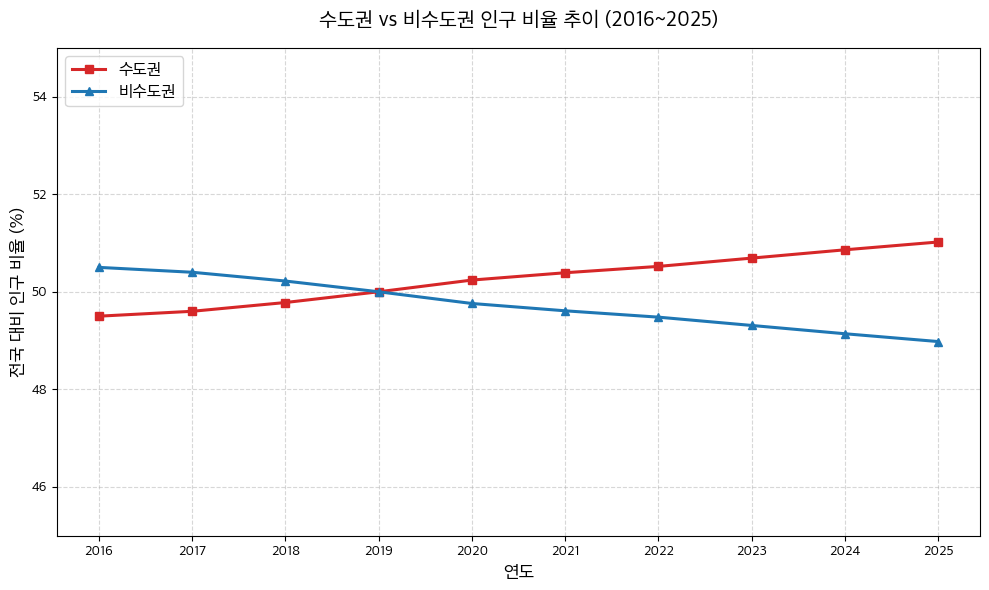

In [58]:
# 최근 10년간 수도권/비수도권 인구 비율 

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Apple SD Gothic Neo'      
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(df['연도'], df['수도권'], label='수도권', marker='s', linewidth=2.2, color='#d62728')
plt.plot(df['연도'], df['비수도권'], label='비수도권', marker='^', linewidth=2.2, color='#1f77b4')

plt.title('수도권 vs 비수도권 인구 비율 추이 (2016~2025)', fontsize=15, pad=15, fontweight='bold')
plt.xlabel('연도', fontsize=13)
plt.ylabel('전국 대비 인구 비율 (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='upper left')
plt.xticks(df['연도'])
plt.ylim(45, 55)
plt.tight_layout()
plt.show()

In [ ]:
최근 10년간 선형적으로 수도권의 인구비율이 늘어나고 있다.

In [ ]:
2008~2019. "행정동별 주민등록 인구 및 세대현황". 행정안전부.

In [33]:
# 인구 증감 요인과의 비교를 위해, 이 지표와 유사한 기간인 2008~2019년 인구 비율을 가져온다
# 웹 페이지 제한으로 데이터를 10년 단위로만 가져올 수 있어, 2개의 데이터 병합

import pandas as pd

filePath = "../../temp_data/0_raw/2010-2019_한국인구.csv"
filePath1 = "../../temp_data/0_raw/2008-2009_한국인구.csv"

df = pd.read_csv(filePath, encoding='cp949', thousands=',')
df1 = pd.read_csv(filePath1, encoding='cp949', thousands=',')


print(df)
print(df1)
print(df.columns)
print(df1.columns)

                     행정구역  2010년_총인구수  2010년_세대수  2010년_남자 인구수  2010년_여자 인구수  \
0        전국  (1000000000)    50515666   19865179      25310385      25205281   
1     서울특별시  (1100000000)    10312545    4224181       5111259       5201286   
2     부산광역시  (2600000000)     3567910    1371346       1773170       1794740   
3     대구광역시  (2700000000)     2511676     934598       1255245       1256431   
4     인천광역시  (2800000000)     2758296    1059664       1390356       1367940   
5     광주광역시  (2900000000)     1454636     540875        721780        732856   
6     대전광역시  (3000000000)     1503664     555768        753648        750016   
7     울산광역시  (3100000000)     1126298     405501        579071        547227   
8       경기도  (4100000000)    11786622    4527282       5942454       5844168   
9       강원도  (4200000000)     1529818     639001        769807        760011   
10     충청북도  (4300000000)     1549528     617431        781301        768227   
11     충청남도  (4400000000)     2075514   

In [34]:
print(df.iloc[:,0] == df1.iloc[:,0])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
Name: 행정구역, dtype: bool


In [35]:
# 병합

df['2008년_총인구수'] = df1['2008년_총인구수']
df['2009년_총인구수'] = df1['2009년_총인구수']
print(df)

                     행정구역  2010년_총인구수  2010년_세대수  2010년_남자 인구수  2010년_여자 인구수  \
0        전국  (1000000000)    50515666   19865179      25310385      25205281   
1     서울특별시  (1100000000)    10312545    4224181       5111259       5201286   
2     부산광역시  (2600000000)     3567910    1371346       1773170       1794740   
3     대구광역시  (2700000000)     2511676     934598       1255245       1256431   
4     인천광역시  (2800000000)     2758296    1059664       1390356       1367940   
5     광주광역시  (2900000000)     1454636     540875        721780        732856   
6     대전광역시  (3000000000)     1503664     555768        753648        750016   
7     울산광역시  (3100000000)     1126298     405501        579071        547227   
8       경기도  (4100000000)    11786622    4527282       5942454       5844168   
9       강원도  (4200000000)     1529818     639001        769807        760011   
10     충청북도  (4300000000)     1549528     617431        781301        768227   
11     충청남도  (4400000000)     2075514   

In [36]:
print(df.head())
print(df.columns)

                  행정구역  2010년_총인구수  2010년_세대수  2010년_남자 인구수  2010년_여자 인구수  \
0     전국  (1000000000)    50515666   19865179      25310385      25205281   
1  서울특별시  (1100000000)    10312545    4224181       5111259       5201286   
2  부산광역시  (2600000000)     3567910    1371346       1773170       1794740   
3  대구광역시  (2700000000)     2511676     934598       1255245       1256431   
4  인천광역시  (2800000000)     2758296    1059664       1390356       1367940   

   2011년_총인구수  2011년_세대수  2011년_남자 인구수  2011년_여자 인구수  2012년_총인구수  ...  \
0    50734284   20033142      25406934      25327350    50948272  ...   
1    10249679    4192752       5073899       5175780    10195318  ...   
2     3550963    1381257       1762848       1788115     3538484  ...   
3     2507271     940770       1251577       1255694     2505644  ...   
4     2801274    1077563       1410980       1390294     2843981  ...   

   2018년_총인구수  2018년_세대수  2018년_남자 인구수  2018년_여자 인구수  2019년_총인구수  2019년_세대수  \
0    51826059   220

In [43]:
# 필요 행(전국/수도권/비수도권), 칼럼(행정구역/각 연도별 총 인구수)만 추출

df = df[df['행정구역'].str.contains('전국|서울특별시|인천광역시|경기도', na=False)]

# 수도권

# 칼럼 추출
pop_cols = [col for col in df.columns if '총인구수' in col]

seoul    = df[df['행정구역'].str.contains('서울')][pop_cols].iloc[0]
incheon  = df[df['행정구역'].str.contains('인천')][pop_cols].iloc[0]
gyeonggi = df[df['행정구역'].str.contains('경기도')][pop_cols].iloc[0]

capital = seoul + incheon + gyeonggi

# 비수도권

national = df[df['행정구역'].str.contains('전국')][pop_cols].iloc[0]
non_capital = national - capital

# staging_df
staging_df = pd.DataFrame({
    '행정구역': ['전국', '수도권', '비수도권'],
    **{col.replace('년_총인구수', '').strip(): [national[col], capital[col], non_capital[col]] 
       for col in pop_cols}
})

# 백분율 전환 (가시성 위함, 전국 = 100.0 기준, 소수점 2자리)
years = [col.replace('년_총인구수', '').strip() for col in pop_cols]

for year in years:
    staging_df[year] = (staging_df[year] / staging_df.loc[staging_df['행정구역'] == '전국', year].values[0] * 100).round(2)

# 순서 조정
staging_df = staging_df[['행정구역'] + sorted([col for col in staging_df.columns if col.isdigit()], key=int)]

print(staging_df)

   행정구역    2008    2009    2010    2011    2012    2013    2014    2015  \
0    전국  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00   
1   수도권   48.82   48.98   49.21   49.25   49.33   49.39   49.41   49.43   
2  비수도권   51.18   51.02   50.79   50.75   50.67   50.61   50.59   50.57   

    2016   2017    2018   2019  
0  100.0  100.0  100.00  100.0  
1   49.5   49.6   49.78   50.0  
2   50.5   50.4   50.22   50.0  


In [44]:
# long data transformation

# 1. '행정구역' 컬럼을 인덱스로 설정합니다.
staging_df = staging_df.set_index('행정구역')

# 2. 데이터프레임을 전치(행/열 전환)합니다.
df_transposed = staging_df.transpose()

# 3. 인덱스 이름을 '연도'로 설정합니다.
df_transposed.index.name = '연도'

# 결과 확인
print(df_transposed)

행정구역     전국    수도권   비수도권
연도                       
2008  100.0  48.82  51.18
2009  100.0  48.98  51.02
2010  100.0  49.21  50.79
2011  100.0  49.25  50.75
2012  100.0  49.33  50.67
2013  100.0  49.39  50.61
2014  100.0  49.41  50.59
2015  100.0  49.43  50.57
2016  100.0  49.50  50.50
2017  100.0  49.60  50.40
2018  100.0  49.78  50.22
2019  100.0  50.00  50.00


In [45]:
df_transposed.to_csv("../../temp_data/1_staging/staging_2008-2019_수도권인구비율.csv", encoding='utf-8-sig')

In [46]:
import pandas as pd

filePath = "../../temp_data/1_staging/staging_2008-2019_수도권인구비율.csv"
df = pd.read_csv(filePath, encoding='utf-8-sig')

print(df.head())
print(df.columns)

     연도     전국    수도권   비수도권
0  2008  100.0  48.82  51.18
1  2009  100.0  48.98  51.02
2  2010  100.0  49.21  50.79
3  2011  100.0  49.25  50.75
4  2012  100.0  49.33  50.67
Index(['연도', '전국', '수도권', '비수도권'], dtype='str')


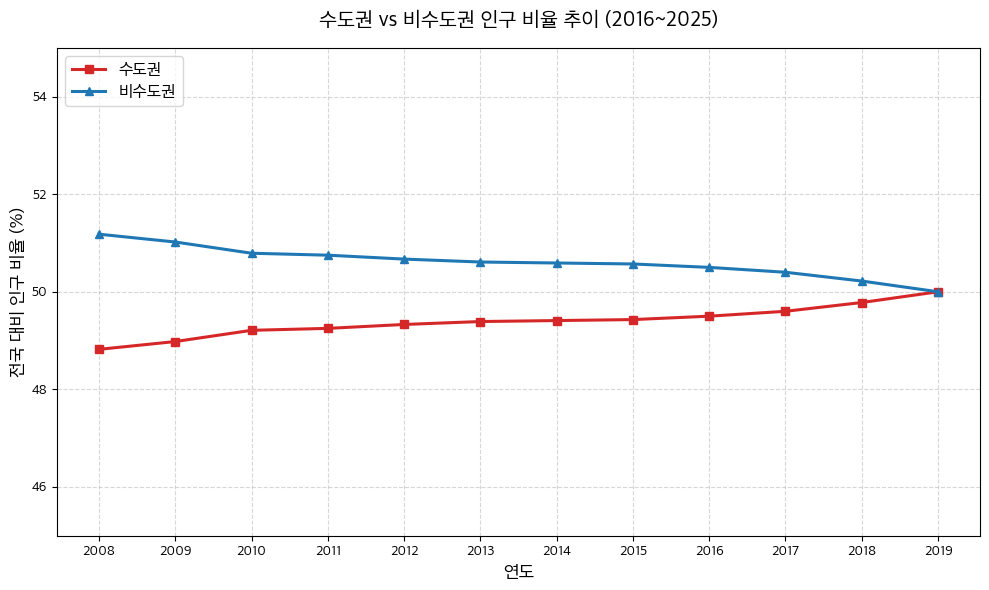

In [47]:
# 최근 10년간 수도권/비수도권 인구 비율 

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Apple SD Gothic Neo'      
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(df['연도'], df['수도권'], label='수도권', marker='s', linewidth=2.2, color='#d62728')
plt.plot(df['연도'], df['비수도권'], label='비수도권', marker='^', linewidth=2.2, color='#1f77b4')

plt.title('수도권 vs 비수도권 인구 비율 추이 (2016~2025)', fontsize=15, pad=15, fontweight='bold')
plt.xlabel('연도', fontsize=13)
plt.ylabel('전국 대비 인구 비율 (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='upper left')
plt.xticks(df['연도'])
plt.ylim(45, 55)
plt.tight_layout()
plt.show()

In [60]:
조사 기간 차이가 존재하여 오차가 있을 수 있다.
병합을 위해, 2008, 2009 통합하였다.
    
한국도시인구증가요인_증감률.csv: 2005, 2019 -> 2008, 2019
staging_2008-2019_수도권인구비율.csv: 2008, 2019

In [85]:
import pandas as pd

increaseFactor_filePath = "../../temp_data/0_raw/한국도시인구증가요인_증감률.csv"
increaseFactor_df = pd.read_csv(increaseFactor_filePath, encoding='utf-8-sig')

seoul_filePath = "../../temp_data/1_staging/staging_2008-2019_수도권인구비율.csv"
seoul_df = pd.read_csv(seoul_filePath, encoding='utf-8-sig')

print(increaseFactor_df)
print(seoul_df)

     연도    지역    생산성    쾌적도  인구수용비용
0  2008   수도권  100.0   96.0    62.0
1  2008  비수도권   98.0  105.0   135.0
2  2019   수도권  120.0   94.0    69.0
3  2019  비수도권  110.0  107.0   133.0
      연도     전국    수도권   비수도권
0   2008  100.0  48.82  51.18
1   2009  100.0  48.98  51.02
2   2010  100.0  49.21  50.79
3   2011  100.0  49.25  50.75
4   2012  100.0  49.33  50.67
5   2013  100.0  49.39  50.61
6   2014  100.0  49.41  50.59
7   2015  100.0  49.43  50.57
8   2016  100.0  49.50  50.50
9   2017  100.0  49.60  50.40
10  2018  100.0  49.78  50.22
11  2019  100.0  50.00  50.00


In [86]:
# 통합된 시각화를 위한 rows(2008, 2019), columns(수도권, 비수도권) 수정

staging_seoul_df = seoul_df.iloc[[0,11],[0,2,3]]

print(staging_seoul_df)

      연도    수도권   비수도권
0   2008  48.82  51.18
11  2019  50.00  50.00


In [ ]:
# 연도/지역별 인구비율과 인구 상승 요인과의 상관관계를 확인하는 그래프

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Apple SD Gothic Neo'      
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 전처리 및 병합 (핵심 단계) ---

# staging_seoul_df를 Long Format으로 변환 (지역을 컬럼에서 행 데이터로 내림)
staging_melted = staging_seoul_df.melt(
    id_vars='연도', 
    var_name='지역', 
    value_name='인구비율'
)

# 두 데이터프레임 병합 (연도와 지역을 기준으로)
merged_df = pd.merge(increaseFactor_df, staging_melted, on=['연도', '지역'])

# print("=== 병합된 데이터 미리보기 ===")
print(merged_df)
print("-" * 30)

     연도    지역    생산성    쾌적도  인구수용비용   인구비율
0  2008   수도권  100.0   96.0    62.0  48.82
1  2008  비수도권   98.0  105.0   135.0  51.18
2  2019   수도권  120.0   94.0    69.0  50.00
3  2019  비수도권  110.0  107.0   133.0  50.00
------------------------------


/Users/wwwji/pyd/venvs/venv1/lib/python3.13/site-packages/seaborn/regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


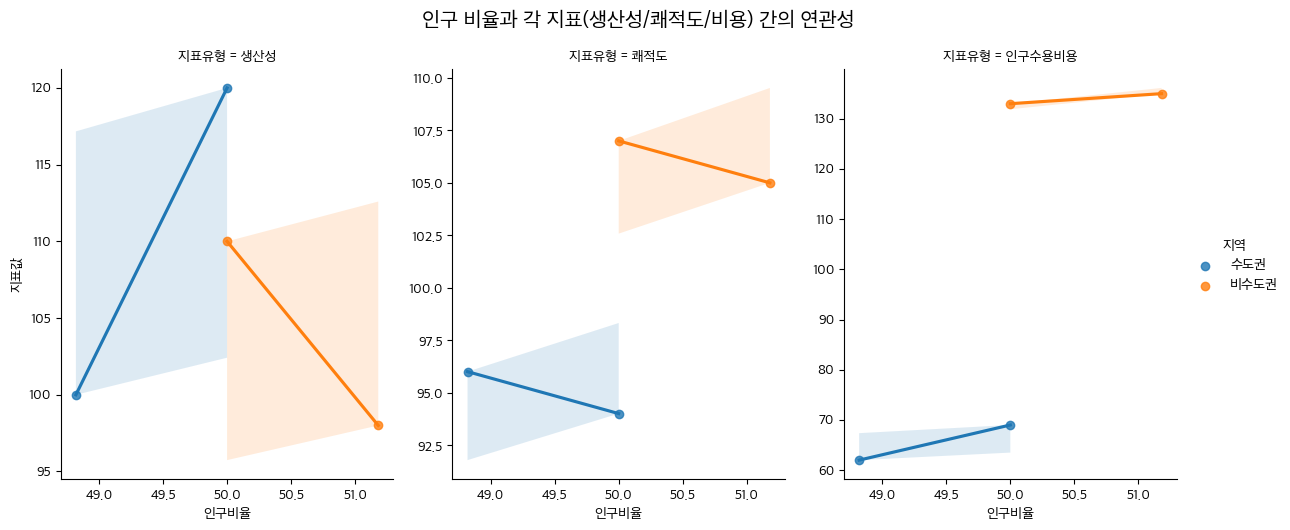

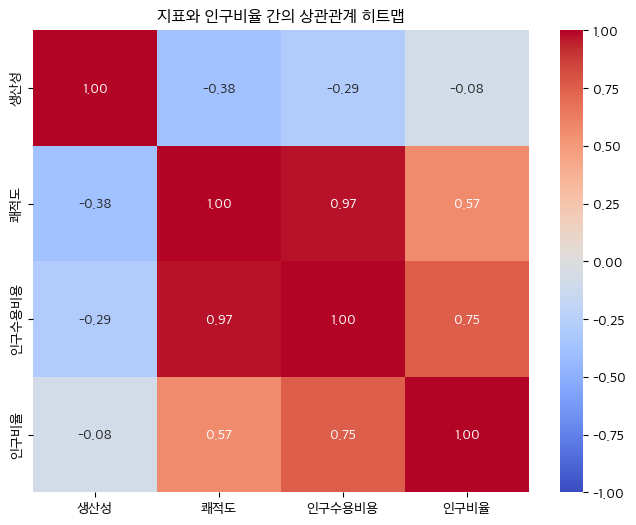

In [88]:
# --- 시각화: 상관관계 분석 ---

# 분석을 위해 지표들을 하나의 컬럼으로 다시 변환 (Seaborn 시각화 용이성 위함)
final_df = merged_df.melt(
    id_vars=['연도', '지역', '인구비율'],
    value_vars=['생산성', '쾌적도', '인구수용비용'],
    var_name='지표유형',
    value_name='지표값'
)

# 시각화: 인구 비율에 따른 각 지표의 변화 (산점도 + 회귀선)
# lmplot을 사용하여 인구비율(x)과 지표값(y)의 관계를 그립니다.
g = sns.lmplot(
    data=final_df,
    x='인구비율',
    y='지표값',
    col='지표유형',   # 지표별로 그래프를 나눔
    hue='지역',       # 지역별로 색상 구분
    sharey=False,     # y축 범위를 각각 다르게 설정
    height=5,
    aspect=0.8
)

g.fig.suptitle('인구 비율과 각 지표(생산성/쾌적도/비용) 간의 연관성', y=1.05, fontsize=15)
plt.show()

# ---  상관계수 히트맵 ---
# 수치적으로 얼마나 강한 관계인지 확인하기 위함
corr_matrix = merged_df[['생산성', '쾌적도', '인구수용비용', '인구비율']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('지표와 인구비율 간의 상관관계 히트맵')
plt.show()

In [2]:
Insight

이 그래프를 올바르게 해석하기 위해 2가지 사실을 기억해야한다.
    
1.  생산성/쾌적도는 인구 상승의 긍정적인 영향을, 인구수용비용은 부정적인 영향을 끼치므로,
    올바른 음/양의 방향에서 해석해야 한다.
2.  데이터 양이 적으므로, 상대적인 관점으로 데이터를 보아야한다.
    ex) 이미 인구 비율과 쾌적도는 양의 상관관계 가진다는 사실에도 불구하고, 상관관계 계수가 (-)이다.
        수도권의 쾌적도가 떨어졌음에도 불구하고, 인구 비율이 증가했기 때문이다.
    
인구 비율과의 33%의 가장 높은 상관관계를 보이는 생산성이 인구 상승의 가장 밀접한 관계가 있다고 판단된다.

In [ ]:
참조(외부) 자료

In [ ]:
수도권 집중 문제

- 수도권 집중의 이유
김선함. 2026. “수도권 집중은 왜 계속되는가: 인구분포 결정요인과 공간정책 함의.”. 한국개발연구원. https://kdi.re.kr/research/focusView?pub_no=19046.

